In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from mpl_toolkits import mplot3d

from math import sqrt
SPINE_COLOR = 'gray'
import numpy as np
import matplotlib.pyplot as plt
plt.get_cmap('gnuplot2')

%matplotlib inline
# Based on: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

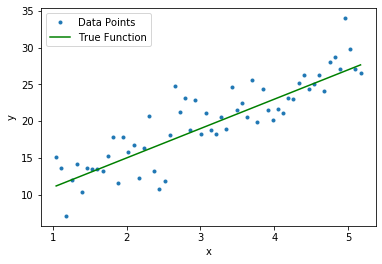

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = 4*x + 7 + np.random.normal(0,3,len(x))

y_true = 4*x + 7
max_deg = 20

data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)
data["ones"] = 1
plt.plot(data['x'],data['y'],'.', label='Data Points')
plt.plot(data['x'], y_true,'g', label='True Function')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('true_function.pdf', transparent=True, bbox_inches="tight")

In [3]:
def cost(theta_0, theta_1, x, y):
    s = 0
    for i in range(len(x)):
        y_i_hat = x[i]*theta_1 + theta_0
        s += (y[i]-y_i_hat)**2
    return s/len(x)

x_grid, y_grid = np.mgrid[-4:15:.2, -4:15:.2]

cost_matrix = np.zeros_like(x_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        cost_matrix[i, j] = cost(x_grid[i, j], y_grid[i, j], data['x'], data['y'])

In [4]:
def cost_lasso(theta_0, theta_1, x, y, lamb):
    s = 0
    for i in range(len(x)):
        y_i_hat = x[i]*theta_1 + theta_0
        s += (y[i]-y_i_hat)**2 + lamb*(abs(theta_0) + abs(theta_1))
    return s/len(x)

x_grid, y_grid = np.mgrid[-4:15:.2, -4:15:.2]



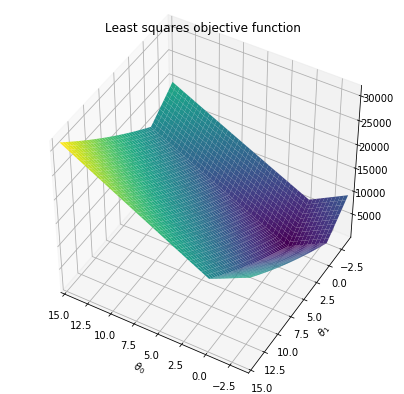

In [5]:
#lambda  = 1000 cost curve tends to lasso objective. 
fig = plt.figure(figsize=(7,7))
lamb_list = [10,100,1000]
for lamb in lamb_list:
    lasso_cost_matrix = np.zeros_like(x_grid)
    for i in range(x_grid.shape[0]):
        for j in range(x_grid.shape[1]):
            lasso_cost_matrix[i, j] = cost_lasso(x_grid[i, j], y_grid[i, j], data['x'], data['y'],lamb)


    ax = plt.axes(projection='3d')
    ax.plot_surface(x_grid, y_grid, lasso_cost_matrix,cmap='viridis', edgecolor='none')

    ax.set_title('Least squares objective function');
    ax.set_xlabel(r"$\theta_0$")
    ax.set_ylabel(r"$\theta_1$")
    ax.set_xlim([-4,15])
    ax.set_ylim([-4,15])

    u = np.linspace(0, np.pi, 30)
    v = np.linspace(0, 2 * np.pi, 30)

    # x = np.outer(500*np.sin(u), np.sin(v))
    # y = np.outer(500*np.sin(u), np.cos(v))
    # z = np.outer(500*np.cos(u), np.ones_like(v))
    # ax.plot_wireframe(x, y, z)

    ax.view_init(45, 120)
    plt.savefig('lasso_lamb_{}_surface.pdf'.format(lamb), transparent=True, bbox_inches="tight")

In [6]:
def yy(p,soln):
    xx = np.linspace(-soln,soln,100)
    xx_final = []
    yy_final = []
    for x in xx:
        if(x>0):
            xx_final.append(x)
            xx_final.append(x)
            y = (soln**p - x**p)**(1.0/p)
            yy_final.append(y)
            yy_final.append(-y)
            
        else:
            xx_final.append(x)
            xx_final.append(x)
            y = (soln**p - (-x)**p)**(1.0/p)
            yy_final.append(y)
            yy_final.append(-y)
    return xx_final, yy_final

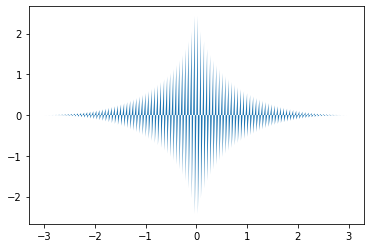

In [189]:
fig,ax = plt.subplots()
ax.fill(xx_final,yy_final)

/home/btech2/miniconda3/envs/latex_slides/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/btech2/miniconda3/envs/latex_slides/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


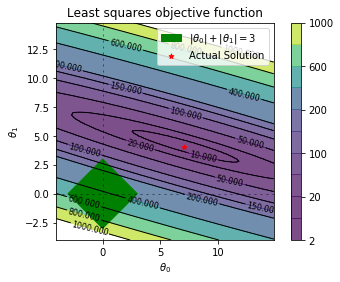

In [185]:
from matplotlib.patches import Rectangle

soln = 3
p  = 0.5
levels = np.sort(np.array([2,10,20,50,100,150,200,400,600,800,1000]))
fig,ax = plt.subplots()
plt.contourf(x_grid, y_grid, cost_matrix, levels,alpha=.7)
plt.colorbar()
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

xx = np.linspace(-soln,soln,100)
y1  = yy1(xx,soln,p)
y2  = yy2(xx,soln,p)

x_final = np.hstack((xx,xx))
y_final = np.hstack((y1,y2))

xx_final, yy_final = yy(p,soln)

plt.fill(xx_final,yy_final)



CS = plt.contour(x_grid, y_grid, cost_matrix, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Least squares objective function")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
p1 = Rectangle((-soln, 0), np.sqrt(2)*soln,np.sqrt(2)*soln, angle = '-45', color='g', label=r'$|\theta_0|+|\theta_1|=3$')
plt.scatter([7], [4],marker='*', color='r',s=25,label='Actual Solution')
plt.gca().add_patch(p1)
plt.legend()
plt.gca().set_aspect('equal')

plt.savefig('lasso_base_contour.pdf', transparent=True, bbox_inches="tight")
plt.show()



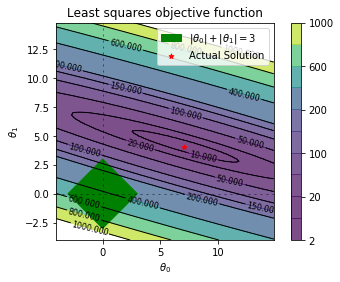

In [86]:
from matplotlib.patches import Rectangle


levels = np.sort(np.array([2,10,20,50,100,150,200,400,600,800,1000]))
fig,ax = plt.subplots()
plt.contourf(x_grid, y_grid, cost_matrix, levels,alpha=.7)
plt.colorbar()
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

plt.scatter(xx, y1, s=0.1,color='k',)
plt.scatter(xx, y2, s=0.1,color='k',)

CS = plt.contour(x_grid, y_grid, cost_matrix, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Least squares objective function")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
p1 = Rectangle((-soln, 0), np.sqrt(2)*soln,np.sqrt(2)*soln, angle = '-45', color='g', label=r'$|\theta_0|+|\theta_1|=3$')
plt.scatter([7], [4],marker='*', color='r',s=25,label='Actual Solution')
plt.gca().add_patch(p1)
plt.legend()
plt.gca().set_aspect('equal')

plt.savefig('lasso_base_contour.pdf', transparent=True, bbox_inches="tight")
plt.show()



In [74]:
regressor.coef_[0] + regressor.coef_[1]

5.74196012460497

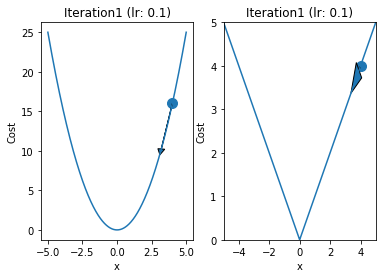

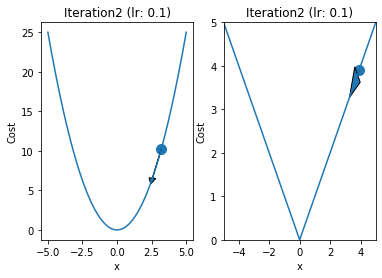

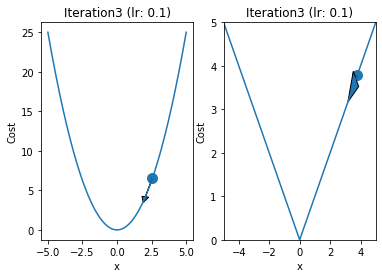

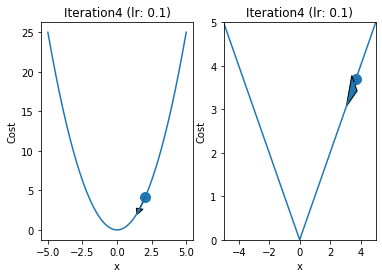

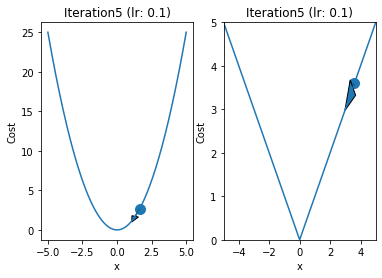

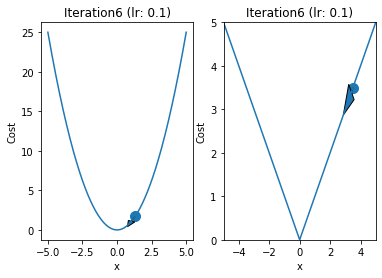

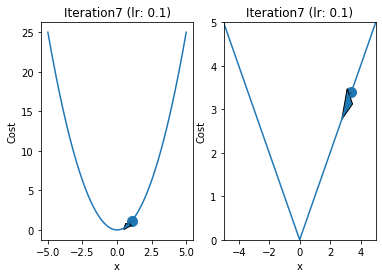

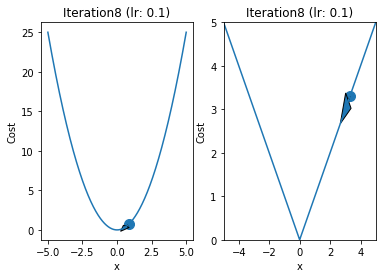

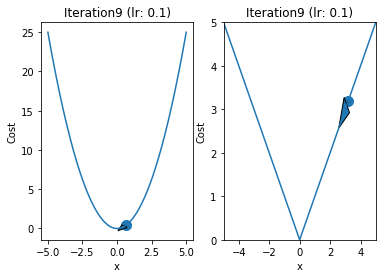

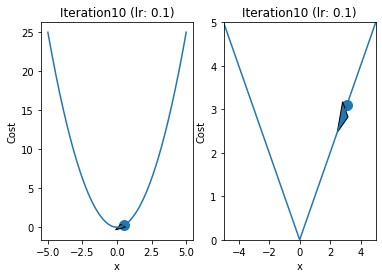

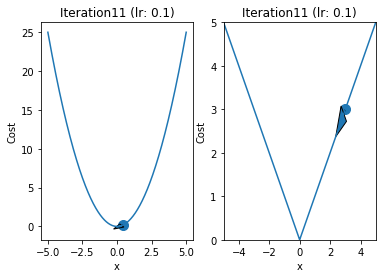

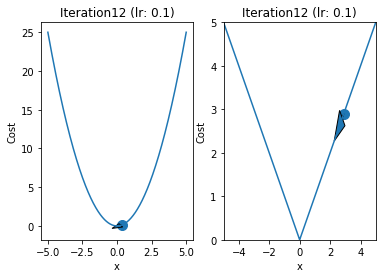

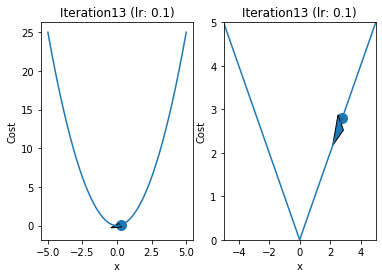

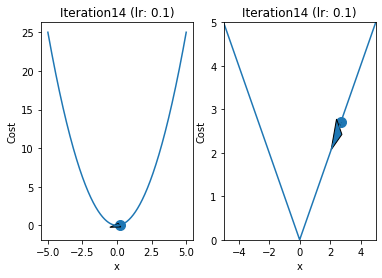

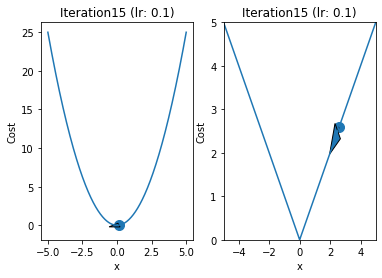

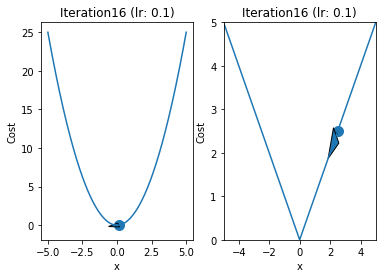

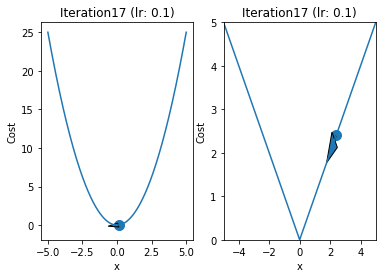

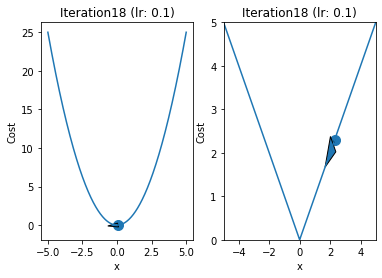

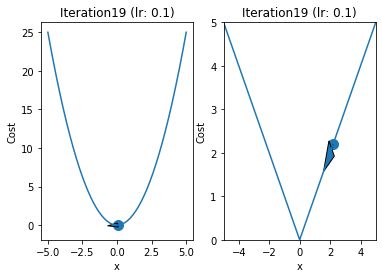

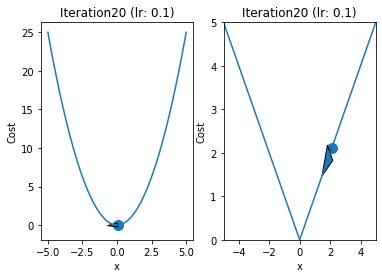

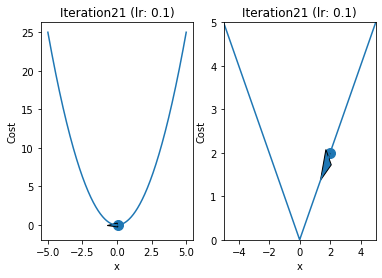

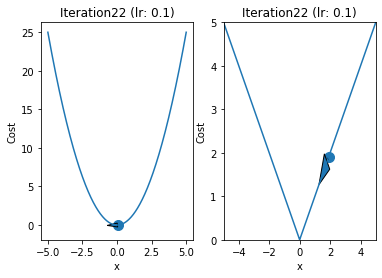

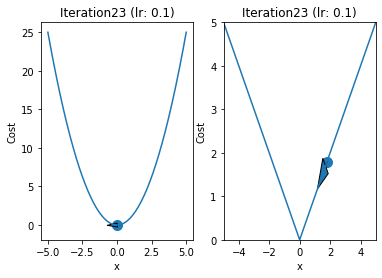

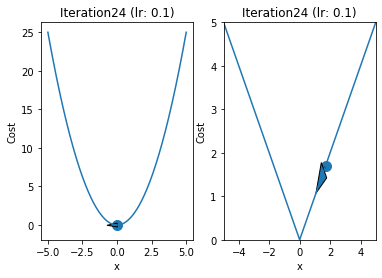

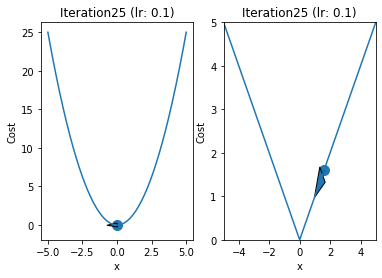

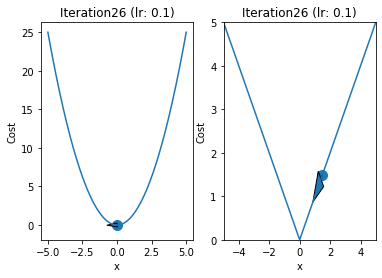

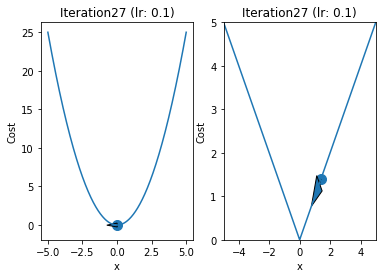

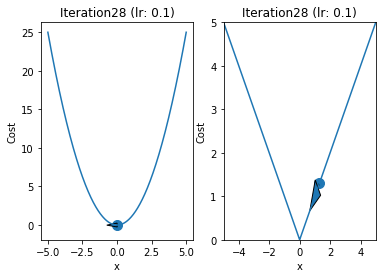

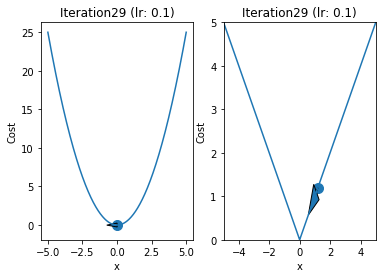

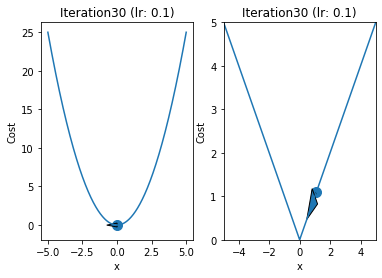

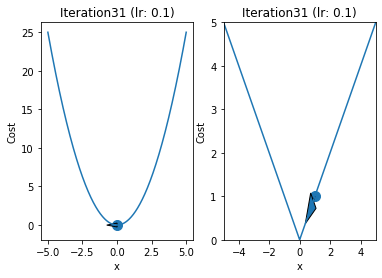

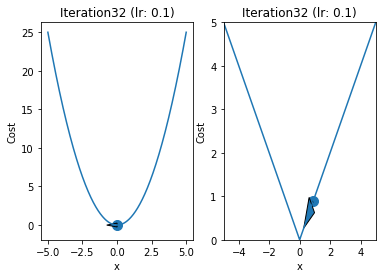

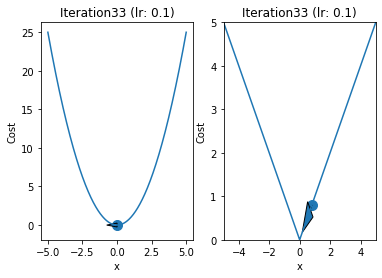

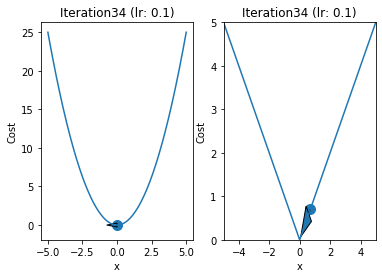

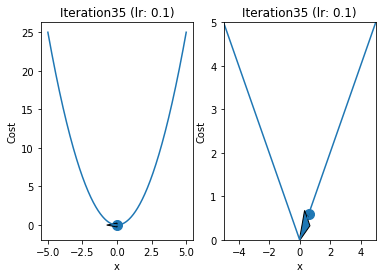

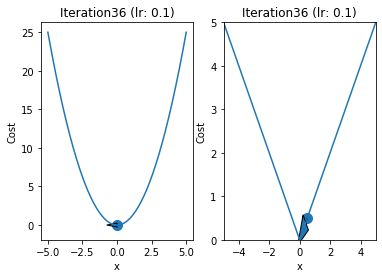

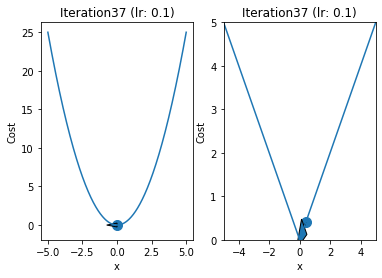

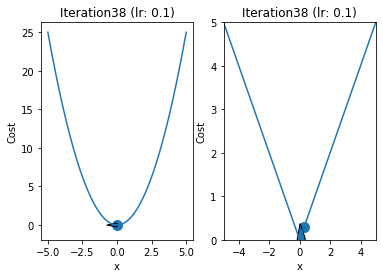

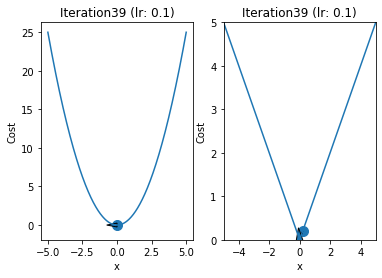

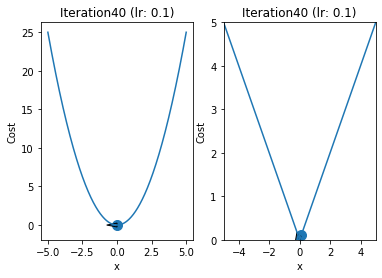

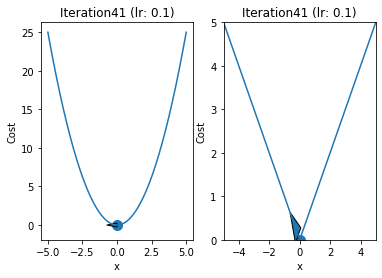

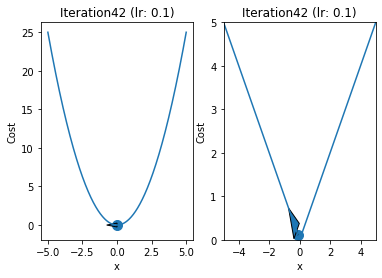

In [ ]:
## Function generator. 
iterations = 60
p = 4
q = 4
alpha  = 0.1

x = np.linspace(-5,5,1000)
y1 = x**2
y2 = abs(x)


for i in range(iterations):
    fig,ax = plt.subplots(1,2)
    ax[0].plot(x,y1)
    ax[1].plot(x,y2)
    prev = p
    qrev = q
    p = p - 2*alpha*p
    q = q - alpha
    val = p
    
    ax[0].arrow(prev,prev**2,p-prev,p**2-prev**2,head_width=0.5)
    ax[1].arrow(qrev,abs(qrev),q - qrev ,abs(q) - abs(qrev),head_width = 0.5)
    ax[0].scatter([prev],[prev**2],s=100)
    ax[1].scatter([qrev],abs(qrev),s=100)
    ax[0].set_xlabel("x")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("Cost")
    ax[0].set_ylabel("Cost")
    ax[1].set_xlim(-5,5)
    ax[1].set_ylim(0,5)
    ax[1].set_title("Iteration"+str(i+1)+" (lr: "+str(alpha)+")")
    ax[0].set_title("Iteration"+str(i+1)+" (lr: "+str(alpha)+")")
    if(i==0):
        plt.savefig("GD_iteration_"+str((i+1)//10)+".pdf", format='pdf',transparent=True)
    if(i%10==9):
        plt.savefig("GD_iteration_"+str((i+1)//10)+".pdf", format='pdf',transparent=True)
    
    plt.show()

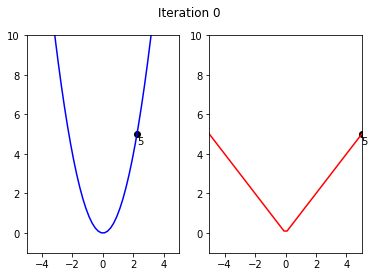

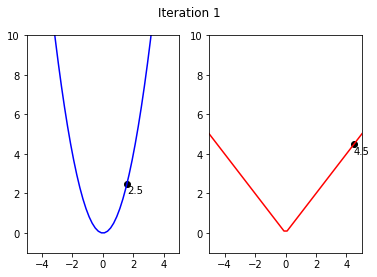

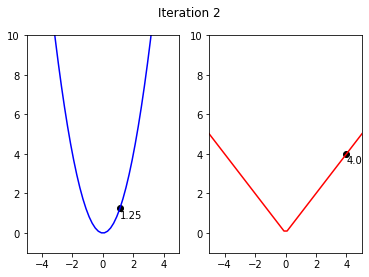

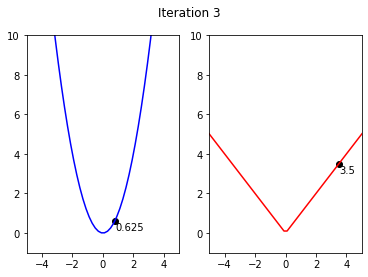

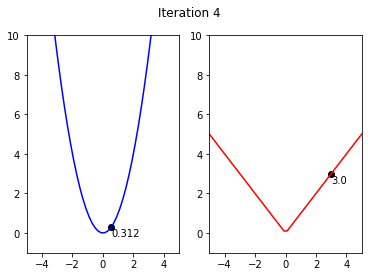

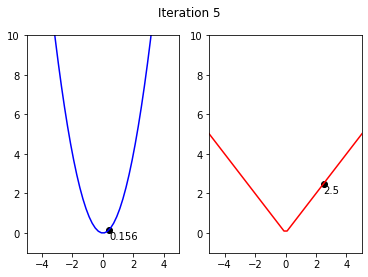

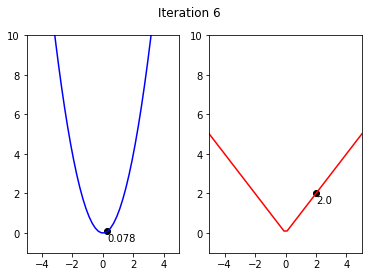

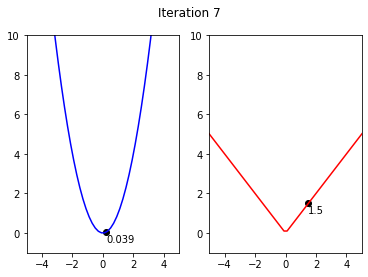

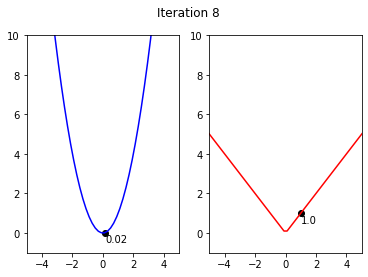

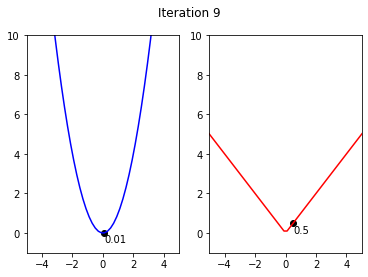

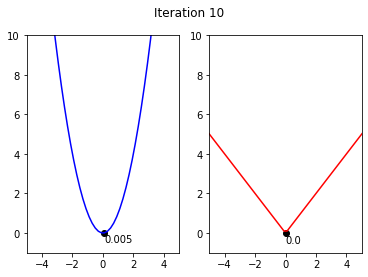

In [109]:
x1,y1= 5**0.5,5
y2,x2 = 5,5
x_shift = 0
y_shift = -0.5
iterations = 11
for i in range(iterations):
    fig, ax = plt.subplots(nrows=1, ncols=2)
   
    ax[0].set_ylim(-1,10)
    ax[0].set_xlim(-5,5)
    ax[1].set_xlim(-5,5)
    ax[1].set_ylim(-1,10)
    ax[0].plot(x,x**2, color = 'blue')
    ax[1].plot(x,abs(x),color = 'red')
    ax[0].scatter(x1,y1,color = 'black')
    
    ax[0].annotate(str(round(y1,3)), (x1 + x_shift, y1+y_shift))
    ax[1].annotate(str(y2), (x2 + x_shift, y2 + y_shift))
    ax[1].scatter(x2,y2,color = 'black')
    fig.suptitle('Iteration {}'.format(i))
    if(iteratio)
    plt.savefig('GD_Iteration_{}.pdf'.format(i))
    
    y1 = y1 - alpha*y1
    y2 = y2 - 0.5
    x2 = y2
    x1 = y1**0.5

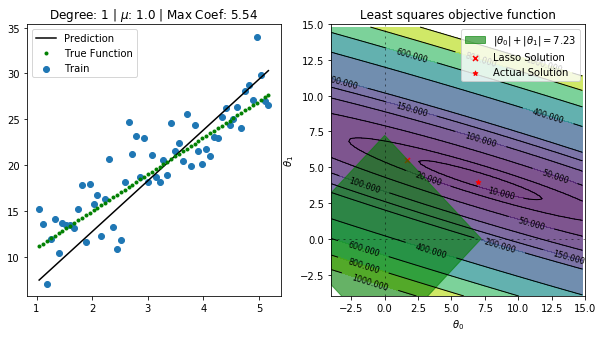

<Figure size 432x288 with 0 Axes>

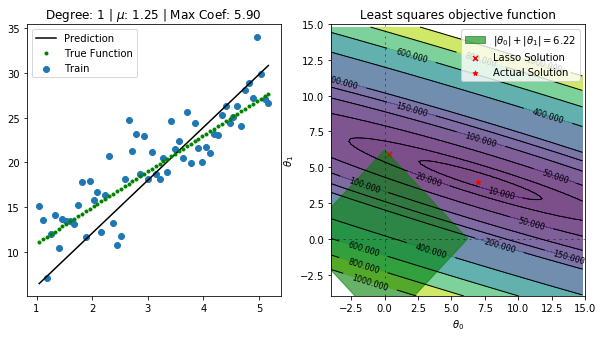

<Figure size 432x288 with 0 Axes>

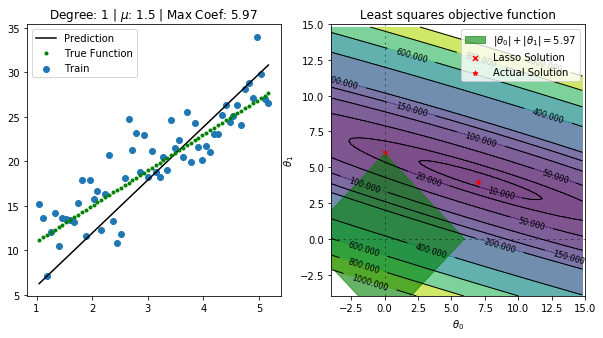

<Figure size 432x288 with 0 Axes>

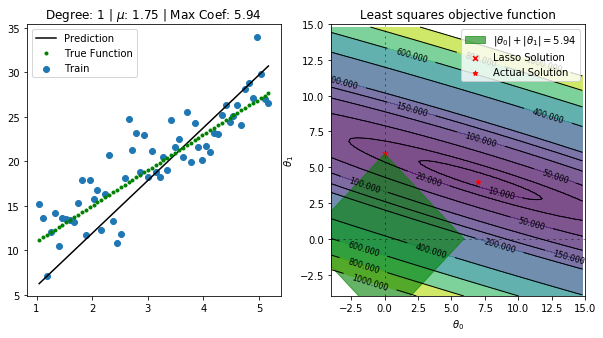

<Figure size 432x288 with 0 Axes>

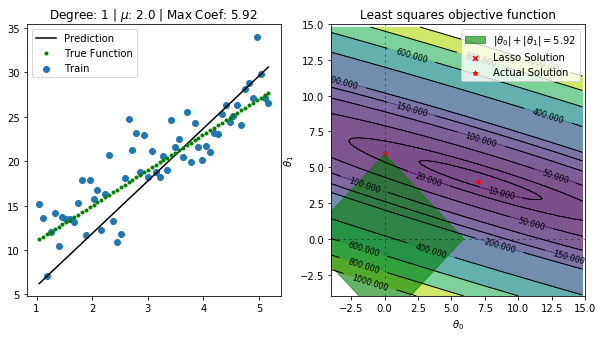

<Figure size 432x288 with 0 Axes>

In [24]:
from sklearn.linear_model import Lasso
from matplotlib.patches import Rectangle


for alpha in np.linspace(1,2,5):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    deg = 1
    predictors = ['ones','x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = Lasso(alpha=alpha,normalize=True, fit_intercept=False)
    regressor.fit(data[predictors],data['y'])
    y_pred = regressor.predict(data[predictors])

    # Plot
    ax[0].scatter(data['x'],data['y'], label='Train')
    ax[0].plot(data['x'], y_pred,'k', label='Prediction')
    ax[0].plot(data['x'], y_true,'g.', label='True Function')
    ax[0].legend() 
    ax[0].set_title(f"Degree: {deg} | $\mu$: {alpha} | Max Coef: {max(regressor.coef_, key=abs):.2f}")

    # Circle
    total = abs(regressor.coef_[0]) + abs(regressor.coef_[1])
    p1 = Rectangle((-total, 0), np.sqrt(2)*total, np.sqrt(2)*total, angle = -45, alpha=0.6, color='g', label=r'$|\theta_0|+|\theta_1|={:.2f}$'.format(total))
    ax[1].add_patch(p1)

    # Contour
    levels = np.sort(np.array([2,10,20,50,100,150,200,400,600,800,1000]))
    ax[1].contourf(x_grid, y_grid, cost_matrix, levels,alpha=.7)
    #ax[1].colorbar()
    ax[1].axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
    ax[1].axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

    CS = plt.contour(x_grid, y_grid, cost_matrix, levels, linewidths=1,colors='black')
    ax[1].clabel(CS, inline=1, fontsize=8)
    ax[1].set_title("Least squares objective function")
    ax[1].set_xlabel(r"$\theta_0$")
    ax[1].set_ylabel(r"$\theta_1$")
    ax[1].scatter(regressor.coef_[0],regressor.coef_[1] ,marker='x', color='r',s=25,label='Lasso Solution')
    ax[1].scatter([7], [4],marker='*', color='r',s=25,label='Actual Solution')
    ax[1].set_xlim([-4,15])
    ax[1].set_ylim([-4,15])
    ax[1].legend()

    plt.savefig('lasso_{}.pdf'.format(alpha), transparent=True, bbox_inches="tight")
    plt.show()
    plt.clf()

/home/btech2/miniconda3/envs/latex_slides/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 659.2329891662157, tolerance: 2.566256097809531
  positive)


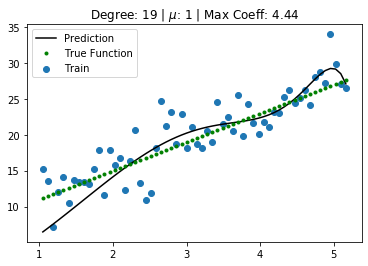

/home/btech2/miniconda3/envs/latex_slides/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5017.444529811921, tolerance: 2.566256097809531
  positive)


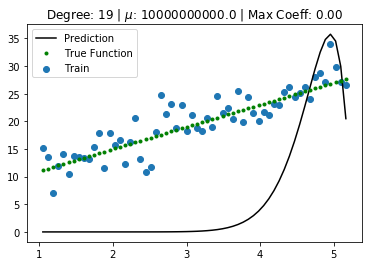

<Figure size 432x288 with 0 Axes>

In [82]:
from sklearn.linear_model import Lasso

for i,deg in enumerate([19]):
    predictors = ['ones', 'x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    for i,alpha in enumerate([1, 1e10]):
        regressor = Lasso(alpha=alpha,normalize=False, fit_intercept=False)
        regressor.fit(data[predictors],data['y'])
        y_pred = regressor.predict(data[predictors])
        plt.scatter(data['x'],data['y'], label='Train')
        plt.plot(data['x'], y_pred,'k', label='Prediction')
        plt.plot(data['x'], y_true,'g.', label='True Function')
        plt.legend() 
        plt.title(f"Degree: {deg} | $\mu$: {alpha} | Max Coeff: {max(regressor.coef_, key=abs):.2f}")
        plt.savefig('lasso_{}_{}.pdf'.format(alpha, deg), transparent=True, bbox_inches="tight")
        plt.show()
        plt.clf()

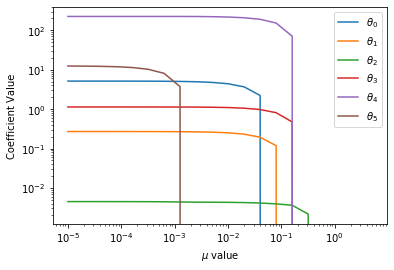

In [108]:
import pandas as pd

data = pd.read_excel("dataset.xlsx")
cols = data.columns
alph_list = np.logspace(-5,1,num=20, endpoint=False)
coef_list = []

for i,alpha in enumerate(alph_list):
    regressor = Lasso(alpha=alpha,normalize=True)
    regressor.fit(data[cols[1:-1]],data[cols[-1]])
    coef_list.append(regressor.coef_)

coef_list = np.abs(np.array(coef_list).T)
for i in range(len(cols[1:-1])):
    plt.loglog(alph_list, coef_list[i] , label=r"$\theta_{}$".format(i))
plt.xlabel('$\mu$ value')
plt.ylabel('Coefficient Value')
plt.legend() 
plt.savefig('lasso_reg.pdf', transparent=True, bbox_inches="tight")